# Functional connectiviy Template 
### (Classifier)
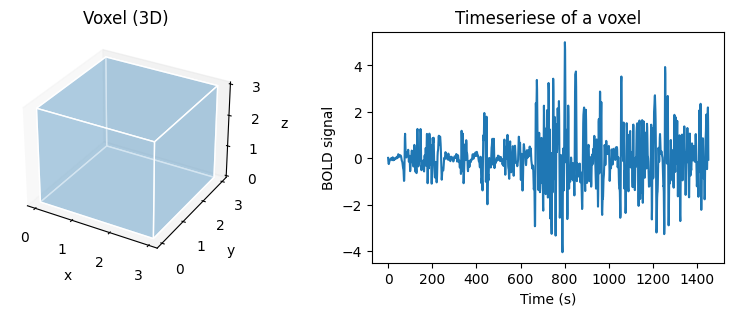

In [1]:
# Import necessary libraries
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from matplotlib import colormaps, colors
from nilearn import datasets, maskers, plotting
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure


# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install optuna-integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 1.1 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Deep Learning libraries
import torch
import optuna
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from optuna.integration import PyTorchLightningPruningCallback

# Device selection: DirectML or fallback to CUDA/CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Functions

def fetch_func_files(wdir, file_suffix='_bold.nii.gz'):
    # Construct the search pattern using the file suffix
    pattern = f'**/*{file_suffix}'
    
    # Convert wdir to a Path object if it's not already one
    wdir = Path(wdir)
    
    # Use glob to find and sort the files matching the pattern
    func_files = sorted(glob(str(wdir / pattern), recursive=True))
    
    # Print the number of files found
    print(f"Number of functional files with suffix '{file_suffix}': {len(func_files)}")
    
    # Return the list of functional file paths
    return func_files
# data = fetch_func_files(wdir, file_suffix='_bold.nii.gz' )

def fetch_dss_files(wdir, task_name='rest'):
    # Construct the search pattern based on the task name
    pattern = f'**/sub-*/func/*task-{task_name}_bold.nii.gz'

    
    # Convert wdir to a Path object if it's not already one
    wdir = Path(wdir)
    
    # Use glob to find and sort the files matching the pattern
    func_files = sorted(glob(str(wdir / pattern), recursive=True))
    
    # Print the number of files found
    print(f"Number of '{task_name}' functional files: {len(func_files)}")
    
    # Return the list of functional file paths
    return func_files
# data_func = fetch_dss_files(wdir, task_name='rest')

def load_json_file(file_name, data_dir):

    data_dir = Path(data_dir)
    file_path = data_dir / file_name
    
    # Check if the file exists
    if not file_path.exists():
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    
    # Read the JSON file
    with file_path.open('r', encoding='utf-8') as file:
        data = json.load(file)
    
    # Print the contents of the JSON file
    print(json.dumps(data, indent=4))
    
    return data
# df_description = load_json_file("dataset_description.json", data_dir=wdir)


In [5]:
# Shortcuts

#dataset = datasets.fetch_adhd(n_subjects=None, data_dir=None, url=None, resume=True, verbose=1)

#dataset = datasets.fetch_openneuro_dataset(urls=None, data_dir=None, dataset_version='ds000030_R1.0.5', verbose=1)[source]

#dataset = datasets.fetch_abide_pcp(n_subjects=None, data_dir=None, url=None)

#dataset = datasets.fetch_development_fmri()

#pheno = pd.DataFrame(dataset.phenotypic)

#print('Keys:',list(data.keys()))
#print('Number of subjects:', len(data.func))
#print('Description:',data.description)


#---------------------------------------------


#wdir = r'C:\Users\lacom\nilearn_data\development_fmri\development_fmri'

#data_func = sorted(glob(os.path.join(wdir,'*.gz')))
#confounds = sorted(glob(os.path.join(wdir,'*desc-confounds_regressors.tsv')))

#print ('Func Data:',len(data))
#print ('Confounds:',len(confounds))

#pheno_path = os.path.join(wdir, 'participants.tsv')
#pheno = pd.read_csv(pheno_path, sep='\t').sort_values('participant_id')
#pheno.head()

## Load the data

In [6]:

dataset = datasets.fetch_development_fmri()

print('Keys:',list(dataset.keys()))
print('Number of subjects:', len(dataset.func))


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/development_fmri


Added README.md to /root/nilearn_data/development_fmri


Dataset created in /root/nilearn_data/development_fmri/development_fmri



 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Keys: ['func', 'confounds', 'phenotypic', 'description']
Number of subjects: 155


In [7]:
'''import shutil

# Define the source and destination paths
source_folder = '/root/nilearn_data/development_fmri'
destination_folder = '/kaggle/working/development_fmri'

# Copy the entire folder to the working directory
shutil.copytree(source_folder, destination_folder)

# Verify the copied folder
import os
print("Files in /kaggle/working/development_fmri/:")
print(os.listdir(destination_folder))
'''

'import shutil\n\n# Define the source and destination paths\nsource_folder = \'/root/nilearn_data/development_fmri\'\ndestination_folder = \'/kaggle/working/development_fmri\'\n\n# Copy the entire folder to the working directory\nshutil.copytree(source_folder, destination_folder)\n\n# Verify the copied folder\nimport os\nprint("Files in /kaggle/working/development_fmri/:")\nprint(os.listdir(destination_folder))\n'

In [8]:
import os

# Check the size of the folder
def get_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    return total_size

folder_size = get_size('/kaggle/working/development_fmri')
print(f"Folder size: {folder_size / (1024 ** 3):.2f} GiB")


Folder size: 0.00 GiB


In [9]:
'''import shutil

# Path to the folder and the ZIP file
folder_to_zip = '/kaggle/working/development_fmri'
zip_file_path = '/kaggle/working/development_fmri.zip'

# Create a ZIP file from the folder
shutil.make_archive('/kaggle/working/development_fmri', 'zip', folder_to_zip)

# Verify the ZIP file
import os
print("Files in /kaggle/working/:")
print(os.listdir('/kaggle/working'))'''


'import shutil\n\n# Path to the folder and the ZIP file\nfolder_to_zip = \'/kaggle/working/development_fmri\'\nzip_file_path = \'/kaggle/working/development_fmri.zip\'\n\n# Create a ZIP file from the folder\nshutil.make_archive(\'/kaggle/working/development_fmri\', \'zip\', folder_to_zip)\n\n# Verify the ZIP file\nimport os\nprint("Files in /kaggle/working/:")\nprint(os.listdir(\'/kaggle/working\'))'

In [10]:
data = dataset.func

In [11]:
print('Description:',dataset.description)

Description: .. _development_dataset:

development fMRI dataset

Access
------
See :func:`nilearn.datasets.fetch_development_fmri`.

Notes
-----
This movie-watching based functional MRI dataset is used for teaching how to use
machine learning to predict age from naturalistic stimuli (movie)
watching with Nilearn.

The dataset consists of 50 children (ages 3-13) and 33 young adults (ages
18-39). This dataset can be used to try to predict who are adults and
who are children.

The data is downsampled to 4mm resolution for convenience. The original
data is downloaded from OpenNeuro.

For full information about pre-processing steps on raw-fMRI data, have a look
at README at https://osf.io/wjtyq/

Full pre-processed data: https://osf.io/5hju4/files/

Raw data can be accessed from : https://openneuro.org/datasets/ds000228/versions/1.0.0

See :footcite:t:`Richardson2018`.

Content
-------
    :'func': functional MRI Nifti images (4D) per subject
    :'confounds': TSV file contain nuisance info

In [12]:
fmri_filenames = data[5]
print(fmri_filenames)

/root/nilearn_data/development_fmri/development_fmri/sub-pixar128_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


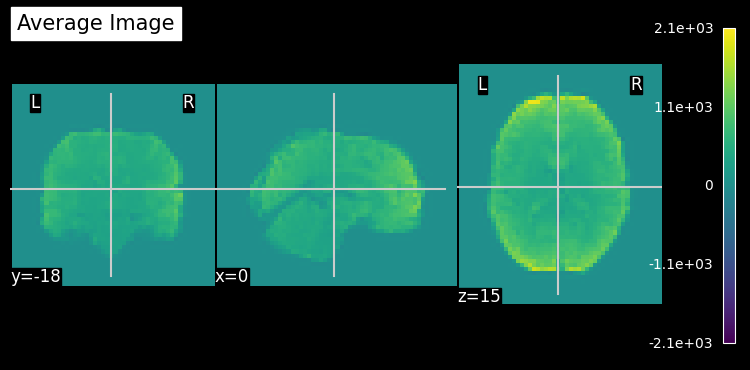

In [13]:
from nilearn import image 
averaged_Img = image.mean_img(image.mean_img(fmri_filenames))
plotting.plot_stat_map(averaged_Img,title='Average Image', cmap='viridis',threshold=0.1, dim=-2, colorbar=True,black_bg=True)

In [14]:
confounds = dataset.confounds
conf = confounds[5]
conf_df = pd.read_table(conf)
conf_df.head()

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05,csf,white_matter
0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,525.521464,473.476960
1,0.002290,0.039488,-0.000004,0.000000,0.000190,0.0,0.051301,-0.009419,0.064324,-0.046474,0.006744,-0.007179,0.025285,529.577966,476.734232
2,-0.000011,-0.104030,-0.009560,0.000164,0.000366,0.0,0.172322,-0.013124,0.010970,0.072557,0.030795,0.015773,-0.063280,531.250261,476.517911
3,-0.000031,0.169104,0.013041,-0.000843,0.000453,0.0,0.350465,0.033150,0.025784,0.036211,0.005530,0.048968,-0.025824,531.240585,476.460569
4,-0.000061,-0.145348,-0.025025,0.000060,0.000386,0.0,0.401084,-0.035600,-0.035397,-0.127860,0.001092,-0.031902,0.048258,531.931781,476.174483


### Explore the Target Variable (Y)

In [15]:
pheno = pd.DataFrame(dataset.phenotypic)
pheno.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness
0,sub-pixar123,27.06,Adult,adult,F,R
1,sub-pixar124,33.44,Adult,adult,M,R
2,sub-pixar125,31.00,Adult,adult,M,R
3,sub-pixar126,19.00,Adult,adult,F,R
4,sub-pixar127,23.00,Adult,adult,F,R


In [16]:
# INFO

# Display the shape of the data
print("Data Shape:")
print(pheno.shape)

# Check for any duplicate entries in the data.
print('')
print("Duplicate Values:")
print('(',pheno.duplicated().sum(),')')


# Display the data types of the columns
print("\nData Types:")
print(pheno.dtypes.value_counts())

# Check for missing values
missing_columns = pheno.columns[pheno.isnull().any()]
if missing_columns.size > 0:
    missing_values = pheno[missing_columns].isnull().sum()
    missing_percentage = (missing_values / len(pheno)) * 100

    # Combine missing_values and missing_percentage into a single DataFrame
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

    # Sort the missing_data DataFrame by Total column in descending order
    missing_data = missing_data.sort_values(by='Total', ascending=False)

    # Print missing data
    print("\nMissing Data:")
    print(missing_data.to_string())
else:
    print("\nNo Missing Values Found")



Data Shape:
(155, 6)

Duplicate Values:
( 0 )

Data Types:
object     5
float64    1
Name: count, dtype: int64

No Missing Values Found


In [17]:
pheno.columns

Index(['participant_id', 'Age', 'AgeGroup', 'Child_Adult', 'Gender',
       'Handedness'],
      dtype='object')

In [18]:
pheno[['participant_id', 'Age', 'Child_Adult', 'Gender']].sample(10)

,participant_id,Age,Child_Adult,Gender
90,sub-pixar058,5.13,child,F
24,sub-pixar147,21.00,adult,M
82,sub-pixar050,5.31,child,F
27,sub-pixar150,19.00,adult,F
139,sub-pixar107,11.51,child,M
30,sub-pixar153,30.00,adult,M
144,sub-pixar112,12.05,child,M
86,sub-pixar054,5.99,child,M
67,sub-pixar035,5.99,child,M
26,sub-pixar149,24.00,adult,F


Number of classes: ['F' 'M']
Gender
F    84
M    71
Name: count, dtype: int64


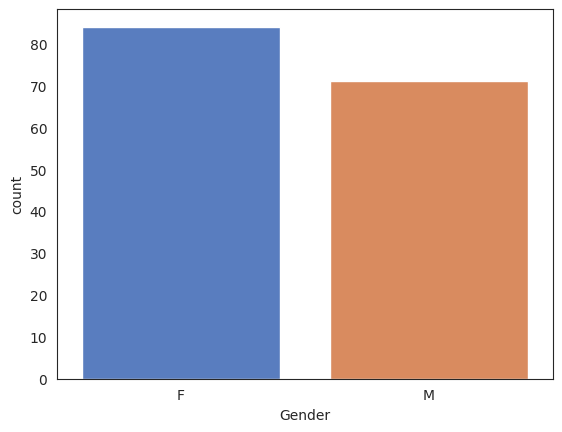

In [19]:
sex = pheno['Gender']

print('Number of classes:',sex.unique())

sns.set_style("white")
sns.set_palette("muted")
sns.countplot(x= sex)

print(sex.value_counts())

**AGE DISTRIBUTION**

Asymmetry: 1.544492
Kurtosis: 1.425876


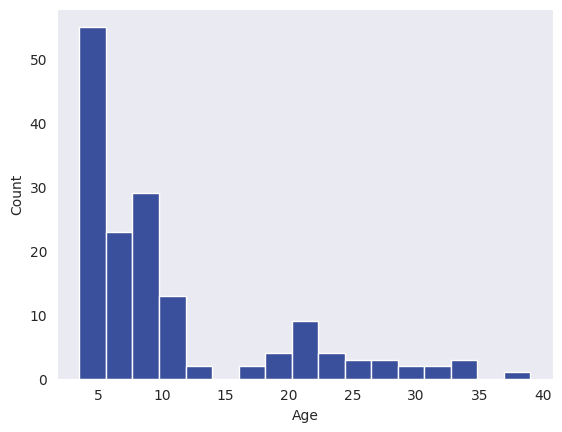

In [20]:
age = pheno['Age']

sns.set_style("dark")
sns.set_palette("dark")
sns.histplot(age)

#skewness and kurtosis
print("Asymmetry: %f" % age.skew())
print("Kurtosis: %f" % age.kurt())

In [21]:
# Group by column
diagnosis = pheno.groupby('Child_Adult')

# Calculate descriptive statistics
diagnosis['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Child_Adult,,,,,,,,
adult,33.0,24.772727,5.308521,18.000000,21.00000,23.00,28.0000,39.0
child,122.0,6.709461,2.330938,3.518138,4.89521,5.98,8.3975,12.3


### Probabilistic Atlas
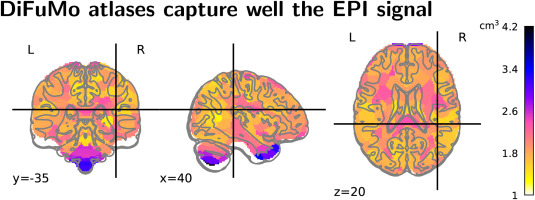

In [22]:
dim = 64
difumo = datasets.fetch_atlas_difumo(
    dimension=dim, resolution_mm=2, legacy_format=False
)

atlas_filename = difumo.maps





Dataset created in /root/nilearn_data/difumo_atlases



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/difumo_atlases/0fd53859aa9fed124e741c85ec45c705/download..... done.


 ...done. (2 seconds, 0 min)


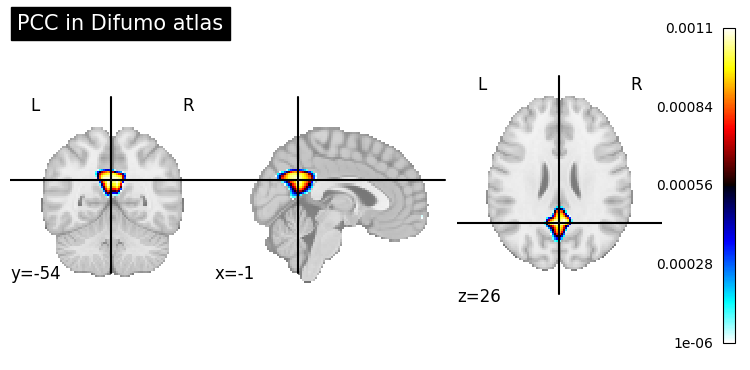

In [23]:
from nilearn import image, plotting

# First plot the map for the PCC: index 3 in the atlas
display = plotting.plot_stat_map(
    image.index_img(atlas_filename, 3),
    colorbar=True,
    title="PCC in Difumo atlas",
)

plotting.show()

In [24]:
difumo.labels

,component,difumo_names,yeo_networks7,yeo_networks17,gm,wm,csf
0,1,Superior frontal sulcus,DefaultB,DefaultA,0.689996,0.185709,0.116884
1,2,Fusiform gyrus,No network found,No network found,0.844733,0.021026,0.133789
2,3,Calcarine cortex posterior,VisCent,VisPeri,0.601768,0.302067,0.091297
3,4,Cingulate cortex posterior,DefaultB,DefaultA,0.740086,0.140368,0.119567
4,5,Parieto-occipital sulcus superior,ContA,ContC,0.640157,0.241492,0.117826
...,...,...,...,...,...,...,...
59,60,Cuneus,VisCent,VisPeri,0.627179,0.269783,0.103005
60,61,Middle temporal gyrus,DefaultB,DefaultB,0.726527,0.149595,0.107329
61,62,Superior frontal gyrus,DefaultB,DefaultB,0.651182,0.062243,0.224067
62,63,Central sulcus,SomMotA,SomMotB,0.578502,0.291674,0.109244


### Extract features with nilearn masker

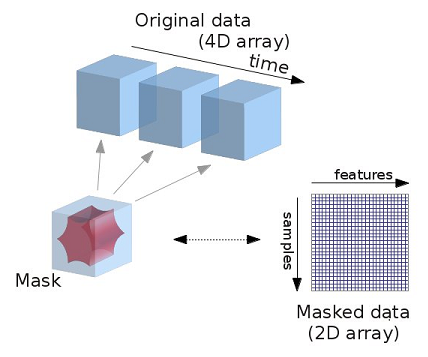 

Compute a correlation matrix, representing regional coactivation between regions and extract signals from a brain parcellation 


In [25]:
from nilearn.maskers import MultiNiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

# create masker using MultiNiftiMapsMasker to extract functional data within
# atlas parcels from multiple subjects using parallelization to speed up the
# # computation
masker = MultiNiftiMapsMasker(
    maps_img=atlas_filename,
    standardize='zscore_sample',
    standardize_confounds='zscore_sample',
    memory='nilearn_cache',
    n_jobs=2, verbose=0
)

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(
    kind='correlation', vectorize=True, discard_diagonal=True)




In [26]:
# METHOD 2

# extract time series from all subjects
#time_series = masker.fit_transform(data, confounds=data_confounds)

# calculate correlation matrices across subjects and display
#correlation_matrices = connectome_measure.fit_transform(time_series)

In [27]:
data[:4]

['/root/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar125_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/root/nilearn_data/development_fmri/development_fmri/sub-pixar126_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

**Extract fMRI connectivity features from every subject.**



In [28]:
# all_features = [connectome_measure.fit_transform([masker.fit_transform(sub, confounds=confounds[i])])[0] for i, sub in enumerate(data)]

In [29]:
# Let's save the data to disk

# np.savez_compressed('Age_Classf_featuress.npz',a = all_features)

In [30]:
# Path to the file in the Kaggle input directory
feat_file = '/kaggle/input/age-classf-featuress/Age_Classf_featuress.npz'

# Load the features
X_features = np.load(feat_file)['a']

# Print the shape of the features
print('Features shape:', X_features.shape)


Features shape: (155, 2016)


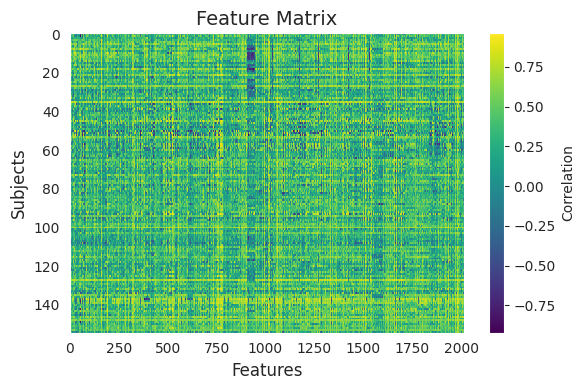

In [31]:
# Create the plot
plt.figure(figsize=(6, 4))
plt.imshow(X_features, aspect='auto', cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar(label='Correlation')

# Add title and labels
plt.title('Feature Matrix', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Subjects', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Prepare data for machine learning

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
y_target = label_encoder.fit_transform(pheno['Gender'])


In [33]:
# Print label encoding mapping
print("Label Encoding Mapping:")
for label, encoding in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoding}")

Label Encoding Mapping:
F: 0
M: 1


In [34]:
# Separate features and target
y = y_target
x = X_features


x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [35]:
# Constants
BATCH_SIZE = 32
TEST_SIZE = 0.25
RANDOM_STATE = 42

# Split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Move data to the appropriate device (DirectML, CUDA, or CPU)
x_train, y_train, x_test, y_test = [t.to(device) for t in [x_train, y_train, x_test, y_test]]

# DataLoader creation
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

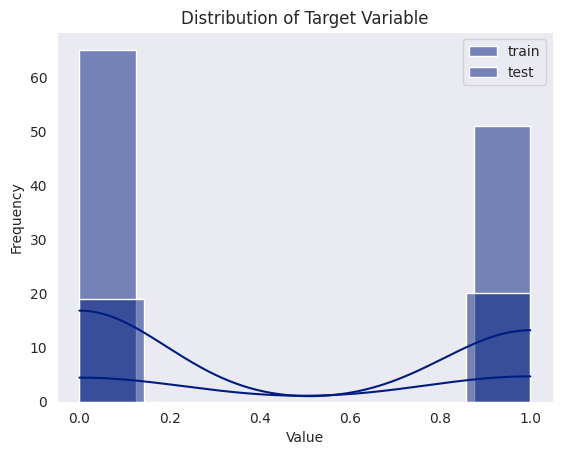

training: 116 testing: 39


In [36]:
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `device` is already defined and is a torch.device object
# Convert tensors to NumPy arrays by first moving them to CPU
y_train_cpu = y_train.cpu().numpy()
y_test_cpu = y_test.cpu().numpy()

# Plot histograms
sns.histplot(y_train_cpu, label='train', kde=True)
sns.histplot(y_test_cpu, label='test', kde=True)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

# Print the size of the training and test sets
print('training:', len(x_train), 'testing:', len(x_test))



## **Non-Linear Model**

In [37]:
labels = difumo.labels["difumo_names"]

feature_mapping = {}
count = 1
for i in range(64):
    for j in range(i+1, 64):
        feature_name = f'{labels[i]} - {labels[j]}'
        feature_mapping[count] = {'name': feature_name, 'index': count}
        count += 1

# Convert the feature_mapping dictionary to a DataFrame
feature_mapping_df = pd.DataFrame.from_dict(feature_mapping, orient='index')

# Reset the index to make the 'index' column a regular column
feature_mapping_df.reset_index(inplace=True)

# Set column names
feature_mapping_df.columns = ['Feature Index', 'Feature Name', 'Feature Details']

# Drop columns
feature_mapping_df.drop(columns=['Feature Details'], inplace=True)

# Print the feature mapping DataFrame

feature_mapping_df.sample(5)

,Feature Index,Feature Name
1590,1591,Lingual gyrus anterior - Heschl’s gyrus
1329,1330,Superior parietal lobule posterior - Paracentr...
303,304,Parieto-occipital sulcus superior - Central su...
687,688,Paracentral gyrus RH - Superior frontal gyrus
1454,1455,Superior rostral gyrus - Caudate


In [38]:
# Assuming you have labels from difumo
labels = difumo.labels["difumo_names"]

# Generate feature names and indices
feature_names = [f'{labels[i]} - {labels[j]}' for i in range(64) for j in range(i + 1, 64)]
feature_indices = list(range(1, len(feature_names) + 1))

# Create a DataFrame
feature_mapping_df = pd.DataFrame({
    'Feature Index': feature_indices,
    'Feature Name': feature_names
})

# Display a sample of the feature mapping DataFrame
print(feature_mapping_df.head(5))


   Feature Index                                       Feature Name
0              1           Superior frontal sulcus - Fusiform gyrus
1              2  Superior frontal sulcus - Calcarine cortex pos...
2              3  Superior frontal sulcus - Cingulate cortex pos...
3              4  Superior frontal sulcus - Parieto-occipital su...
4              5   Superior frontal sulcus - Insula antero-superior


### **Run the Classification Model**

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, precision_recall_curve, auc
from torch.utils.data import DataLoader

# Classification Model Definition
class ClassificationModel(nn.Module):
    def __init__(self, input_dim, hidden_layers, dropout_rate, activation_fn):
        super(ClassificationModel, self).__init__()
        layers = []
        last_dim = input_dim

        # Hidden layers
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(last_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            if activation_fn == 'relu':
                layers.append(nn.ReLU())
            elif activation_fn == 'leaky_relu':
                layers.append(nn.LeakyReLU())
            layers.append(nn.Dropout(dropout_rate))
            last_dim = hidden_dim

        # Output layer (Binary classification)
        layers.append(nn.Linear(last_dim, 1))
        layers.append(nn.Sigmoid())
        
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Hyperparameter Optimization Function using Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_layers = trial.suggest_categorical('hidden_layers', [[256, 128], [512, 256, 128], [512, 256]])
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    patience = trial.suggest_int('patience', 5, 15)
    activation_fn = trial.suggest_categorical('activation_fn', ['relu', 'leaky_relu'])
    optimizer_name = trial.suggest_categorical('optimizer', ['AdamW', 'SGD'])
    scheduler_name = trial.suggest_categorical('scheduler', ['CosineAnnealingLR', 'StepLR'])

    # Model initialization
    model = ClassificationModel(input_dim=x_train.shape[1], hidden_layers=hidden_layers,
                                dropout_rate=dropout_rate, activation_fn=activation_fn).to(device)
    
    # Optimizer selection
    if optimizer_name == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay, momentum=0.9)
    
    # Loss function
    criterion = nn.BCELoss()
    
    # Scheduler selection
    if scheduler_name == 'CosineAnnealingLR':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=MAX_EPOCHS)
    elif scheduler_name == 'StepLR':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    
    # DataLoader with updated batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Training loop with early stopping
    best_loss = float('inf')
    no_improvement = 0

    for epoch in range(MAX_EPOCHS):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()

        val_loss /= len(test_loader)
        scheduler.step()

        # Early stopping
        if val_loss < best_loss - 1e-3:
            best_loss = val_loss
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patience:
            break

    return best_loss

# Hyperparameter Optimization using Optuna
MAX_EPOCHS = 100  # Define maximum epochs
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # Conduct 100 trials for optimization

# Retrieve the best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

[I 2024-09-16 18:18:29,920] A new study created in memory with name: no-name-4703fb86-7ce0-43a2-80ce-925a8c93f8bc
[I 2024-09-16 18:18:31,497] Trial 0 finished with value: 0.6671522259712219 and parameters: {'hidden_layers': [512, 256, 128], 'dropout_rate': 0.3469678830535029, 'lr': 0.0010831031575248608, 'weight_decay': 0.0006699752246990689, 'batch_size': 128, 'patience': 7, 'activation_fn': 'leaky_relu', 'optimizer': 'SGD', 'scheduler': 'CosineAnnealingLR'}. Best is trial 0 with value: 0.6671522259712219.
[I 2024-09-16 18:18:31,747] Trial 1 finished with value: 0.884105771780014 and parameters: {'hidden_layers': [512, 256], 'dropout_rate': 0.24865136898460513, 'lr': 0.009703974740913193, 'weight_decay': 4.660542837260788e-06, 'batch_size': 32, 'patience': 9, 'activation_fn': 'leaky_relu', 'optimizer': 'AdamW', 'scheduler': 'CosineAnnealingLR'}. Best is trial 0 with value: 0.6671522259712219.
[I 2024-09-16 18:18:31,834] Trial 2 finished with value: 0.6907903552055359 and parameters: {

Best hyperparameters: {'hidden_layers': [512, 256], 'dropout_rate': 0.2159526938098495, 'lr': 0.000607379224681484, 'weight_decay': 0.0009439310087376465, 'batch_size': 64, 'patience': 9, 'activation_fn': 'relu', 'optimizer': 'SGD', 'scheduler': 'CosineAnnealingLR'}


In [40]:
# Model Training Function
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, max_epochs, patience):
    best_loss = float('inf')
    no_improvement = 0

    for epoch in range(max_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()

        val_loss /= len(test_loader)
        print(f"Epoch [{epoch+1}/{max_epochs}], Train Loss: {running_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}")
        scheduler.step()

        # Early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            no_improvement = 0
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print("Early stopping triggered")
            break

    return model

# Model Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    all_outputs, all_labels = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            all_outputs.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    all_outputs = np.concatenate(all_outputs)
    all_labels = np.concatenate(all_labels)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(all_labels, all_outputs)
    accuracy = accuracy_score(all_labels, np.round(all_outputs))
    return auc_roc, accuracy

# Initialize Model with the Best Hyperparameters
hidden_layers = best_params['hidden_layers']
dropout_rate = best_params['dropout_rate']
activation_fn = best_params['activation_fn']
lr = best_params['lr']
weight_decay = best_params['weight_decay']
optimizer_name = best_params['optimizer']
scheduler_name = best_params['scheduler']

model = ClassificationModel(input_dim=x_train.shape[1], hidden_layers=hidden_layers,
                            dropout_rate=dropout_rate, activation_fn=activation_fn).to(device)

# Select Optimizer
if optimizer_name == 'AdamW':
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay, momentum=0.9)

# Loss Function
criterion = nn.BCELoss()

# Select Scheduler
if scheduler_name == 'CosineAnnealingLR':
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=MAX_EPOCHS)
elif scheduler_name == 'StepLR':
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Train the Model
train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False)
trained_model = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, max_epochs=MAX_EPOCHS, patience=best_params['patience'])


Epoch [1/100], Train Loss: 0.7278, Val Loss: 0.6929
Epoch [2/100], Train Loss: 0.6676, Val Loss: 0.6931
Epoch [3/100], Train Loss: 0.6851, Val Loss: 0.6932
Epoch [4/100], Train Loss: 0.7055, Val Loss: 0.6934
Epoch [5/100], Train Loss: 0.6778, Val Loss: 0.6932
Epoch [6/100], Train Loss: 0.6540, Val Loss: 0.6929
Epoch [7/100], Train Loss: 0.6241, Val Loss: 0.6923
Epoch [8/100], Train Loss: 0.6150, Val Loss: 0.6917
Epoch [9/100], Train Loss: 0.6136, Val Loss: 0.6912
Epoch [10/100], Train Loss: 0.6000, Val Loss: 0.6904
Epoch [11/100], Train Loss: 0.5812, Val Loss: 0.6896
Epoch [12/100], Train Loss: 0.5955, Val Loss: 0.6889
Epoch [13/100], Train Loss: 0.5420, Val Loss: 0.6887
Epoch [14/100], Train Loss: 0.5393, Val Loss: 0.6879
Epoch [15/100], Train Loss: 0.5268, Val Loss: 0.6865
Epoch [16/100], Train Loss: 0.5362, Val Loss: 0.6854
Epoch [17/100], Train Loss: 0.5199, Val Loss: 0.6838
Epoch [18/100], Train Loss: 0.4986, Val Loss: 0.6832
Epoch [19/100], Train Loss: 0.4922, Val Loss: 0.6820
Ep

In [41]:
# Evaluate the Model
auc_roc, accuracy = evaluate_model(trained_model, test_loader)
print(f"Test AUC: {auc_roc:.4f}, Test Accuracy: {accuracy:.4f}")

Test AUC: 0.6237, Test Accuracy: 0.6410


### Feature Importance Analysis

In [44]:
# Feature importance
def perturbation_rank(model, x_test, y_test, feature_names, verbose=False):
    model.eval()
    baseline_loss = criterion(model(x_test), y_test).item()
    importance_scores = []

    for i in range(x_test.shape[1]):
        x_test_perturbed = x_test.clone()
        x_test_perturbed[:, i] = x_test_perturbed[torch.randperm(x_test_perturbed.size(0)), i]
        perturbed_loss = criterion(model(x_test_perturbed), y_test).item()
        importance = perturbed_loss - baseline_loss
        importance_scores.append(importance)

        if verbose:
            print(f"Feature {feature_names[i]} - Perturbed Loss: {perturbed_loss:.4f} - Importance: {importance:.4f}")

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    return importance_df


# Feature Importance
feature_names = feature_mapping_df['Feature Name'].tolist()
importance_df = perturbation_rank(trained_model, x_test, y_test, feature_names)

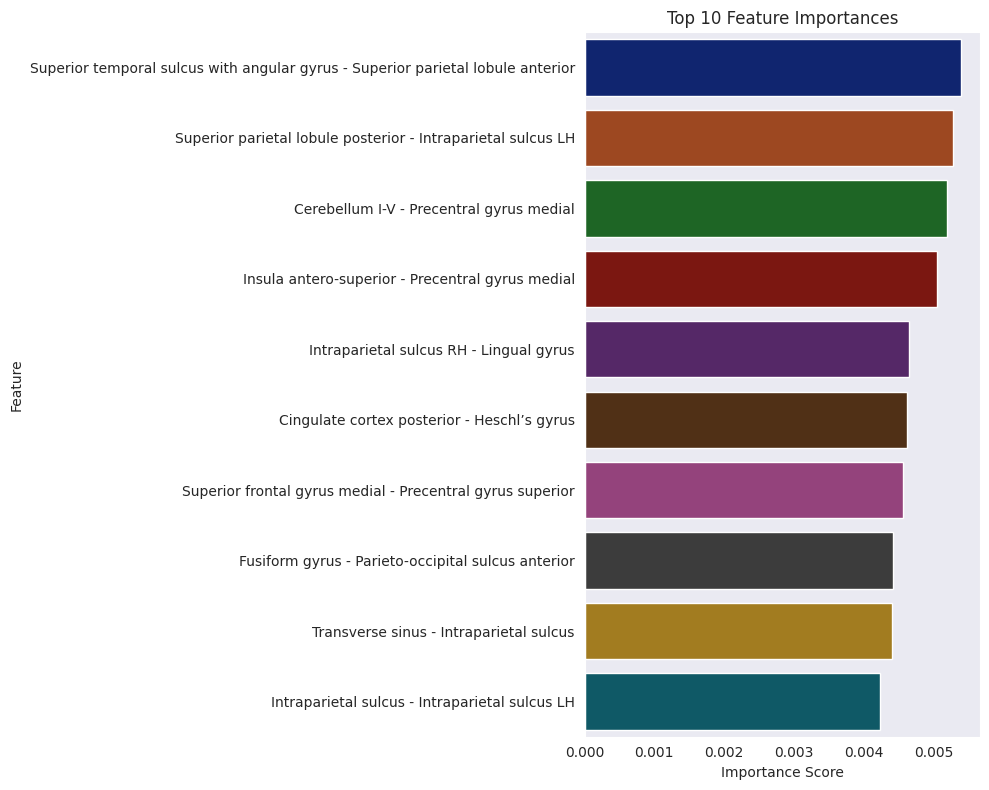

In [45]:
# Plot top 10 feature importances
top_10_feature_importances = importance_df.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_feature_importances)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [58]:
importance_df.Feature

0       Superior temporal sulcus with angular gyrus - ...
1       Superior parietal lobule posterior - Intrapari...
2                Cerebellum I-V - Precentral gyrus medial
3        Insula antero-superior - Precentral gyrus medial
4                 Intraparietal sulcus RH - Lingual gyrus
                              ...                        
2011     Intraparietal sulcus LH - Angular gyrus inferior
2012                  Cerebellum Crus II - Cerebellum I-V
2013           Transverse sinus - Intraparietal sulcus RH
2014                  Planum polare - Supramarginal gyrus
2015    Fusiform gyrus posterior - Inferior occipital ...
Name: Feature, Length: 2016, dtype: object

In [59]:
# Feature Importance Visuals

difumo_labels = difumo.labels

roi_names = 'Superior temporal sulcus with angular gyrus|Superior parietal lobule posterior' 

ft_link = difumo_labels[difumo_labels['difumo_names'].str.contains(roi_names, case=False)]

roi_index = ft_link.index.tolist()

ft_link['difumo_names']

6     Superior temporal sulcus with angular gyrus
26             Superior parietal lobule posterior
Name: difumo_names, dtype: object

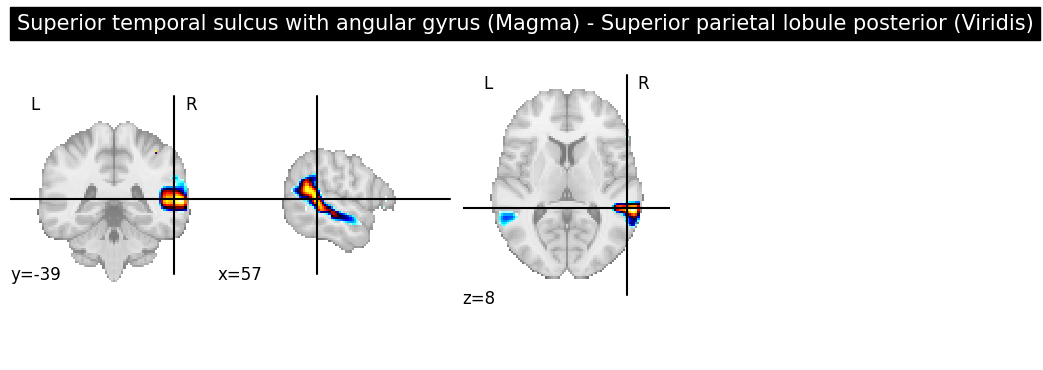

In [61]:
from nilearn import image

# First plot the map for the Region of Interest: index (i) in the atlas
display = plotting.plot_stat_map(
    image.index_img(atlas_filename, 6),
    colorbar=False,
    title='Superior temporal sulcus with angular gyrus (Magma) - Superior parietal lobule posterior (Viridis)',
)

cmaps = [
    plotting.cm.black_red,
    plotting.cm.black_green,
    plotting.cm.black_pink,
]

for index, cmap in zip([26], cmaps ):
    display.add_overlay(image.index_img(atlas_filename, index), cmap='viridis')

plotting.show()

### Visualize Regions of Interest

In [62]:
difumo_labels = difumo.labels
marker_labels = difumo_labels['difumo_names'].tolist() 

# grab center coordinates for probabilistic atlas
coords = plotting.find_probabilistic_atlas_cut_coords(
    maps_img=difumo.maps)

In [63]:
# Functions

def transform_df(df):
    """
    Transform the DataFrame by splitting the 'Feature Name' column into 'Marker1' and 'Marker2',
    dropping the original 'Feature Name' column, renaming 'Importance Score' to 'Correlation',
    and returning the transformed DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with columns 'Feature Index', 'Feature Name', and 'Importance Score'.
    
    Returns:
    pd.DataFrame: The transformed DataFrame with columns 'Feature Index', 'Marker1', 'Marker2', and 'Correlation'.
    """
    
    # Ensure 'Feature Name' column exists
    if 'Feature' not in df.columns or 'Importance' not in df.columns:
        raise ValueError("Input DataFrame must contain 'Feature Name' and 'Importance Score' columns.")
    
    # Split `Feature Name` into `Marker1` and `Marker2`
    df[['Marker1', 'Marker2']] = df['Feature'].str.split(' - ', n=1, expand=True)
    
    # Drop the 'Feature Name' column
    df = df.drop(columns=['Feature'])
    
    
    return df



def visualize_connectome(df_sorted, coords, marker_labels, cmap_markers='viridis', cmap_edges='Paired'):
    # Ensure marker_labels is a list
    if isinstance(marker_labels, pd.Index):
        marker_labels = marker_labels.tolist()

    # Extract unique markers from the top rows
    unique_markers = pd.unique(df_sorted[['Marker1', 'Marker2']].values.ravel('K'))

    # Filter marker labels and coordinates to only include those in unique_markers
    filtered_indices = [i for i, label in enumerate(marker_labels) if label in unique_markers]
    filtered_coords = coords[filtered_indices]
    filtered_labels = [marker_labels[i] for i in filtered_indices]

    # Normalize correlations for color mapping
    norm = colors.Normalize(vmin=df_sorted['Importance'].min(), vmax=df_sorted['Importance'].max())
    cmap_markers = colormaps.get_cmap(cmap_markers)
    cmap_edges = colormaps.get_cmap(cmap_edges)

    # Create a Plotly figure
    fig = go.Figure()

    # Add nodes to the plot
    fig.add_trace(go.Scatter3d(
        x=filtered_coords[:, 0],
        y=filtered_coords[:, 1],
        z=filtered_coords[:, 2],
        mode='markers+text',
        marker=dict(size=8, color=[colors.to_hex(cmap_markers(norm(c))) for c in df_sorted['Importance']]),  # Use cmap for node colors
        text=filtered_labels,
        textfont=dict(color='white', size=13, family="Arial"),  # Larger font size
        textposition='middle right',  # Position labels on the right
        name='Markers'
    ))

    # Add edges to the plot
    for i, row in df_sorted.iterrows():
        marker1 = row['Marker1']
        marker2 = row['Marker2']
        correlation = row['Importance']

        marker1_idx = filtered_labels.index(marker1)
        marker2_idx = filtered_labels.index(marker2)

        fig.add_trace(go.Scatter3d(
            x=[filtered_coords[marker1_idx, 0], filtered_coords[marker2_idx, 0]],
            y=[filtered_coords[marker1_idx, 1], filtered_coords[marker2_idx, 1]],
            z=[filtered_coords[marker1_idx, 2], filtered_coords[marker2_idx, 2]],
            mode='lines',
            line=dict(color=colors.to_hex(cmap_edges(norm(correlation))), width=3),  # Use cmap for edge colors
            name=f"{marker1} - {marker2} ({correlation:.2f})"
        ))

    # Update layout
    fig.update_layout(
        title=dict(
            text='',
            x=0.5,  # Center the title
            y=0.95,  # Move the title slightly up to avoid overlap
            font=dict(size=26, color='white', family="Arial")
        ),
        paper_bgcolor='black',  # Black background for the entire figure
        plot_bgcolor='black',   # Black background for the plot area
        scene=dict(
            xaxis=dict(
                title=dict(text='X', font=dict(size=18, color='white')),
                showbackground=False,
                showgrid=True,
                gridcolor='rgba(50, 50, 50, 0.5)',  # Dark gray gridlines
                showline=True,
                linecolor='white',  # White axis lines
                showticklabels=False,
                zeroline=False
            ),
            yaxis=dict(
                title=dict(text='Y', font=dict(size=18, color='white')),
                showbackground=False,
                showgrid=True,
                gridcolor='rgba(50, 50, 50, 0.5)',  # Dark gray gridlines
                showline=True,
                linecolor='white',
                showticklabels=False,
                zeroline=False
            ),
            zaxis=dict(
                title=dict(text='Z', font=dict(size=18, color='white')),
                showbackground=False,
                showgrid=True,
                gridcolor='rgba(50, 50, 50, 0.5)',  # Dark gray gridlines
                showline=True,
                linecolor='white',
                showticklabels=False,
                zeroline=False
            )
        ),
        margin=dict(
            l=20,  # Adjusted margins for better spacing
            r=20,
            b=20,
            t=20
        ),
        width=600,  # Width of the plot
        height=400,  # Height of the plot
        showlegend=True,
        legend=dict(
            x=0.0,  # Center the title
            y=-0.2,  # Move the title slightly up to avoid overlap
            font=dict(size=10, color='white', family="Arial"),  # White font for the legend
            bgcolor='rgba(0, 0, 0, 0)',  # Transparent background for the legend
        )
    )
    
    if fig:
        fig.write_html('connectome_plot.html')
        print("Plot successfully saved as 'connectome_plot.html'")
    else:
        print("No figure returned.")

    # Show the plot
    fig.show()

In [64]:
marker_corr = transform_df(importance_df)
marker_corr

,Importance,Marker1,Marker2
0,0.005392,Superior temporal sulcus with angular gyrus,Superior parietal lobule anterior
1,0.005281,Superior parietal lobule posterior,Intraparietal sulcus LH
2,0.005185,Cerebellum I-V,Precentral gyrus medial
3,0.005047,Insula antero-superior,Precentral gyrus medial
4,0.004649,Intraparietal sulcus RH,Lingual gyrus
...,...,...,...
2011,-0.004826,Intraparietal sulcus LH,Angular gyrus inferior
2012,-0.004857,Cerebellum Crus II,Cerebellum I-V
2013,-0.004913,Transverse sinus,Intraparietal sulcus RH
2014,-0.005036,Planum polare,Supramarginal gyrus


In [65]:
visualize_connectome(marker_corr.head(4), coords, marker_labels, cmap_markers='Paired', cmap_edges='cool')

Plot successfully saved as 'connectome_plot.html'
